In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from MyML import *

In [2]:
data = pd.read_csv('fashion-mnist_train.csv').as_matrix()

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
newdata = oneHotEncode(data,[0])

In [4]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test

In [5]:
train,val,test = TVTsplit(newdata)

In [6]:
Ytrain = train[:,(len(train[0,])-10):]
Xtrain = train[:,:(len(train[0,])-10)]
Yval = val[:,(len(val[0,])-10):]
Xval = val[:,:(len(val[0,])-10)]
Ytest = test[:,(len(test[0,])-10):]
Xtest = test[:,:(len(test[0,])-10)]

In [7]:
def asnumeric(x):
    return list(map(float,x))

Xtrain = np.matrix(list(map(asnumeric,Xtrain.T))).T
Xval = np.matrix(list(map(asnumeric,Xval.T))).T
Xtest = np.matrix(list(map(asnumeric,Xtest.T))).T

In [8]:
trainmins = np.array(list(map(np.nanmin,Xtrain.T)))
trainmaxs = np.array(list(map(np.nanmax,Xtrain.T)))

In [9]:
for i in range(0,784):
    Xtrain[:,i] = (Xtrain[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xval[:,i] = (Xval[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xtest[:,i] = (Xtest[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])


In [10]:

def ROC(X,Y,w1,b1,w2,b2):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply(X>i,Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((X>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str(round((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2,4))
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()
for i in range(0,10):
    ROC(softmax(A2val)[:,i],np.matrix(Yval[:,i]).T,w1,b1,w2,b2)
print(np.mean(np.rint(softmax(A2val)) == Yval))
np.sum(np.multiply(np.rint(softmax(A2val)),Yval), axis = 0)/np.sum(Yval, axis = 0)


NameError: name 'A2val' is not defined

In [ ]:
newtestdata = oneHotEncode(testdata,[0])

In [ ]:
Ynew = newtestdata[:,(len(newtestdata[0,])-10):]
Xnew = newtestdata[:,:(len(newtestdata[0,])-10)]

In [ ]:
Xnew = np.matrix(list(map(asnumeric,Xnew.T))).T

In [ ]:
for i in range(0,784):
    Xnew[:,i] = (Xnew[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])

In [ ]:
A1new = Xnew@w1 + b1
Z1new = np.tanh(A1new)
A2new = Z1new@w2 + b2
phatnew = softmax(A2new)
print(np.mean(np.rint(phatnew) == Ynew))
np.sum(np.multiply(np.rint(phatnew),Ynew))/np.sum(Ynew)

In [ ]:
newphat = np.zeros((phatnew.shape[0],phatnew.shape[1]))

In [ ]:
for i in range(0,len(newphat[:,0])):
    newphat[i,np.argmax(phatnew[i,])] = 1

In [ ]:
newphat =np.eye(phatnew.shape[1])[np.argmax(phatnew,axis = 1)][:,0,:]

In [ ]:
np.sum(np.multiply(np.rint(newphat),Ynew), axis = 0)/np.sum(Ynew, axis = 0)

In [ ]:
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)
def tander(Z):
    return 1-np.multiply(Z,Z)
def GCEC(Y,Yhat):
    return -np.sum(np.multiply(Y,np.log(Yhat)))/len(Y[:,0])
class TSNN:
    def __init__(self, nodes = [5,3,6,3],indims = 2,
                 activation = np.tanh, actder = tander,
                 outputactivation = softmax, cost = GCEC):
        self.layers = len(nodes)
        self.indims = indims
#         self.outdims = outdims
        self.nodes = nodes
        self.actder = actder
        self.costfunc = cost
        if type(activation) == type([]):
            self.activation = activation
        else:
            self.activation = []
            for i in range(0,len(nodes)):
                self.activation.append(activation)
            print(self.activation)
        self.outputactivation = outputactivation
    def weightInitialization(self):
        self.weights = {}
        self.biases = {}
        self.weights['w0']=np.random.randn(self.indims,self.nodes[0])
        self.biases['b0'] = np.random.randn(1,self.nodes[0])
        for i in range(1,self.layers):
            self.weights['w'+str(i)] = np.random.randn(self.nodes[i-1],self.nodes[i])
            self.biases['b'+str(i)] = np.random.randn(1,self.nodes[i])
    def predict(self, X):
        self.Z = {}
        self.Z['0'] = X
        for i in range(1,len(self.nodes)):
            self.Z[str(i)] = self.activation[i-1](
                self.Z[str(i-1)]@self.weights['w'+str(i-1)]
                +self.biases['b'+str(i-1)])
        self.predictions = self.outputactivation(
            self.Z[str(len(self.nodes)-1)]@self.weights['w'+str(
                self.layers-1)] + self.biases['b'+str(self.layers- 1)])
        return self.predictions
    def train(self, X,Y,Xval = [],Yval =[], epochs = 10, learningRate = .00001):
        errs = []
        if len(Xval) == 0:
            Xval = X
            Yval = Y
        for i in range(0,epochs):
            js = np.linspace(len(self.weights)-1,0,len(self.weights))
            d = self.predict(X) - Y
            for j in range(len(self.weights)-1,-1,-1):
                self.weights['w'+str(j)] = self.weights['w'+str(j)]- learningRate*self.Z[str(j)].T@d
                self.biases['b'+str(j)] = self.biases['b'+str(j)]\
                - learningRate*np.sum(d,axis = 0)
                d = np.multiply(d@self.weights['w'+str(j)].T,
                                self.actder(self.Z[str(j)]))
            errs.append(self.costfunc(Yval,self.predict(Xval)))
        plt.plot(errs)

In [11]:
model = NeuralNetwork(indims = Xtrain.shape[1],activations = ['relu','relu'], nodes = [60,60,Ytrain.shape[1]], taskType = 'c')

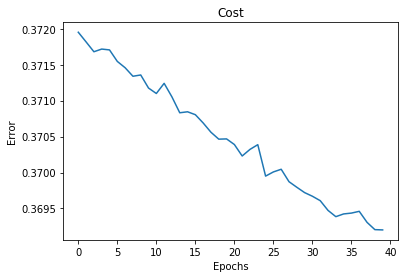

In [69]:
model.train(np.asarray(Xtrain),np.asarray(Ytrain),np.asarray(Xval),np.asarray(Yval), epochs = 40, gamma = .80, moment = .8, lr = .0002,optim = 'adam')

In [70]:
accuracy(model.prediction,np.asarray(Yval))

0.9740888888888889

In [68]:
recall(model.prediction,np.asarray(Yval))

array([0.83277217, 0.97486339, 0.77483444, 0.87361419, 0.78226712,
       0.94545455, 0.65337763, 0.93825799, 0.9579646 , 0.95227525])